In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

# 資料前處理

In [3]:
train = pd.read_csv('/content/drive/MyDrive/ML/三總/train.csv')


In [4]:
train

,PID,UID,EF
0,P00001,U00001,61.0
1,P00001,U00002,70.0
2,P00001,U00003,68.0
3,P00001,U00004,69.0
4,P00002,U00007,61.0
...,...,...,...
9801,P03070,U13964,70.0
9802,P03071,U13965,64.0
9803,P03071,U13966,51.0
9804,P03071,U13967,50.0


In [5]:
print('共計',train.shape[0],'筆ECG')
print('共有',len(set(train['PID'])),'位病人')
print('EF小於35共計',sum(train['EF']<35),'佔比',round(sum(train['EF']<35)/len(train['EF'])*100,2),'%')
print('EF大於35共計',sum(train['EF']>=35),'佔比',round(sum(train['EF']>=35)/len(train['EF'])*100,2),'%')

共計 9806 筆ECG
共有 3071 位病人
EF小於35共計 610 佔比 6.22 %
EF大於35共計 9196 佔比 93.78 %


In [10]:
data_u00001 = pd.read_csv('/content/drive/MyDrive/ML/三總/ecg/U00001.csv')

In [11]:
data_u00001


,leadI,leadII,leadIII,leadaVR,leadaVL,leadaVF,leadV1,leadV2,leadV3,leadV4,leadV5,leadV6
0,4,7,3,-6,0,5,-4,-4,-5,-3,7,8
1,30,56,23,-43,2,40,-43,-66,-57,-26,31,54
2,-10,-9,-1,9,-5,-4,-31,-62,-73,-60,-34,-14
3,-23,-37,-14,29,-6,-25,5,-11,-49,-65,-67,-70
4,-20,-36,-17,28,-2,-26,19,19,-28,-50,-55,-67
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-5,-5,-6,-11,-9,-5,-11,6,-27,-36,-10,-11
996,-5,-5,-6,-12,-9,-6,-11,6,-28,-37,-11,-11
997,-5,-4,-7,-12,-9,-5,-11,7,-28,-37,-11,-9
998,-5,-4,-6,-13,-9,-5,-11,7,-28,-37,-11,-9


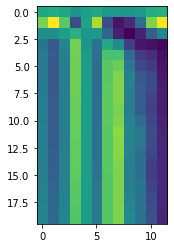

In [12]:
plt.imshow(np.array(data_u00001.head(20)))

In [6]:
x_train = pd.DataFrame()

for uid in train['UID']:
    print('處理',uid)
    ecg = pd.read_csv('/content/drive/MyDrive/ML/三總/ecg/{}.csv'.format(uid))
    ecg_scaled = preprocessing.MinMaxScaler().fit_transform(ecg)
    ecg_vec = ecg_scaled.reshape(1,12000)
    x_train = pd.concat([x_train, pd.DataFrame(ecg_vec)], ignore_index=True, sort=False)

串流輸出內容已截斷至最後 5000 行。
處理 U06973
處理 U06974
處理 U06975
處理 U06978
處理 U06979
處理 U06980
處理 U06981
處理 U06982
處理 U06983
處理 U06986
處理 U06987
處理 U06988
處理 U06989
處理 U06990
處理 U06991
處理 U06992
處理 U06993
處理 U06994
處理 U06995
處理 U06996
處理 U06997
處理 U07000
處理 U07001
處理 U07004
處理 U07005
處理 U07006
處理 U07007
處理 U07008
處理 U07009
處理 U07010
處理 U07013
處理 U07014
處理 U07017
處理 U07018
處理 U07019
處理 U07022
處理 U07023
處理 U07024
處理 U07025
處理 U07026
處理 U07027
處理 U07028
處理 U07029
處理 U07030
處理 U07031
處理 U07032
處理 U07033
處理 U07034
處理 U07035
處理 U07036
處理 U07037
處理 U07040
處理 U07041
處理 U07044
處理 U07045
處理 U07046
處理 U07049
處理 U07050
處理 U07053
處理 U07054
處理 U07055
處理 U07056
處理 U07057
處理 U07058
處理 U07061
處理 U07062
處理 U07065
處理 U07066
處理 U07069
處理 U07070
處理 U07073
處理 U07074
處理 U07075
處理 U07076
處理 U07077
處理 U07078
處理 U07079
處理 U07080
處理 U07081
處理 U07082
處理 U07083
處理 U07084
處理 U07085
處理 U07086
處理 U07089
處理 U07090
處理 U07091
處理 U07092
處理 U07093
處理 U07094
處理 U07095
處理 U07096
處理 U07099
處理 U07100
處理 U07101
處理 U07102
處理 U07103
處理 U07104

In [8]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,0.369863,0.330827,0.328125,0.660194,0.750000,0.323232,0.698925,0.753247,0.693548,0.400000,...,0.187500,0.582524,0.000000,0.222222,0.612903,0.837662,0.508065,0.193548,0.370130,0.342391
1,0.165354,0.145631,0.631579,0.880734,0.290698,0.291667,0.898734,0.909091,0.883721,0.719101,...,0.473684,0.844037,0.151163,0.125000,0.873418,0.880682,0.874419,0.662921,0.212121,0.422819
2,0.467066,0.141732,0.277778,0.701493,0.636364,0.195652,0.759740,0.816568,0.555556,0.273504,...,0.129630,0.671642,0.578512,0.021739,0.714286,0.739645,0.509259,0.153846,0.099291,0.048611
3,0.144144,0.551724,0.634921,0.613793,0.298969,0.600000,0.866667,0.818182,0.617117,0.622449,...,0.566138,0.586207,0.206186,0.518919,0.846667,0.844156,0.603604,0.598639,0.576132,0.527919
4,0.263158,0.363636,0.627451,0.762712,0.316667,0.536585,0.684932,0.565217,0.331169,0.223881,...,0.450980,0.661017,0.133333,0.292683,0.520548,0.460870,0.266234,0.169154,0.117647,0.129496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,0.242188,0.329670,0.555556,0.718447,0.302752,0.382353,0.750000,0.624413,0.513966,0.398734,...,0.470085,0.650485,0.220183,0.220588,0.616667,0.563380,0.441341,0.316456,0.239726,0.139344
9802,0.214286,0.221053,0.675000,0.825000,0.207317,0.253731,0.677419,0.668790,0.669065,0.437500,...,0.500000,0.775000,0.085366,0.014925,0.588710,0.592357,0.205036,0.296875,0.222749,0.190955
9803,0.180000,0.228070,0.777778,0.830986,0.188235,0.484848,0.839080,0.763780,0.535714,0.384937,...,0.625000,0.746479,0.058824,0.151515,0.701149,0.692913,0.428571,0.284519,0.204348,0.131313
9804,0.426573,0.209677,0.515873,0.651163,0.451852,0.410714,0.627660,0.627660,0.439490,0.326087,...,0.476190,0.558140,0.362963,0.303571,0.574468,0.553191,0.401274,0.282609,0.202073,0.195804


In [15]:
x_train['y'] = (train.EF <35)*1

In [16]:
# 儲存壓縮gz
x_train.to_csv('/content/drive/MyDrive/ML/三總/all_train_mm.gz', compression='gzip', index=False)

In [2]:
x_train = pd.read_csv('/content/drive/MyDrive/ML/三總/all_train_mm.gz')

In [3]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,11991,11992,11993,11994,11995,11996,11997,11998,11999,y
0,0.369863,0.330827,0.328125,0.660194,0.750000,0.323232,0.698925,0.753247,0.693548,0.400000,...,0.582524,0.000000,0.222222,0.612903,0.837662,0.508065,0.193548,0.370130,0.342391,0
1,0.165354,0.145631,0.631579,0.880734,0.290698,0.291667,0.898734,0.909091,0.883721,0.719101,...,0.844037,0.151163,0.125000,0.873418,0.880682,0.874419,0.662921,0.212121,0.422819,0
2,0.467066,0.141732,0.277778,0.701493,0.636364,0.195652,0.759740,0.816568,0.555556,0.273504,...,0.671642,0.578512,0.021739,0.714286,0.739645,0.509259,0.153846,0.099291,0.048611,0
3,0.144144,0.551724,0.634921,0.613793,0.298969,0.600000,0.866667,0.818182,0.617117,0.622449,...,0.586207,0.206186,0.518919,0.846667,0.844156,0.603604,0.598639,0.576132,0.527919,0
4,0.263158,0.363636,0.627451,0.762712,0.316667,0.536585,0.684932,0.565217,0.331169,0.223881,...,0.661017,0.133333,0.292683,0.520548,0.460870,0.266234,0.169154,0.117647,0.129496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,0.242188,0.329670,0.555556,0.718447,0.302752,0.382353,0.750000,0.624413,0.513966,0.398734,...,0.650485,0.220183,0.220588,0.616667,0.563380,0.441341,0.316456,0.239726,0.139344,0
9802,0.214286,0.221053,0.675000,0.825000,0.207317,0.253731,0.677419,0.668790,0.669065,0.437500,...,0.775000,0.085366,0.014925,0.588710,0.592357,0.205036,0.296875,0.222749,0.190955,0
9803,0.180000,0.228070,0.777778,0.830986,0.188235,0.484848,0.839080,0.763780,0.535714,0.384937,...,0.746479,0.058824,0.151515,0.701149,0.692913,0.428571,0.284519,0.204348,0.131313,0
9804,0.426573,0.209677,0.515873,0.651163,0.451852,0.410714,0.627660,0.627660,0.439490,0.326087,...,0.558140,0.362963,0.303571,0.574468,0.553191,0.401274,0.282609,0.202073,0.195804,0


# 模型建置

In [4]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [5]:
y0 = x_train[x_train['y'] == 0]
y1 = x_train[x_train['y'] == 1]

In [6]:
print(y0.shape)
print(y1.shape)

(9196, 12001)
(610, 12001)


In [7]:
dataset = pd.concat([y0[0:1000],y1],axis=0).sample(frac=1,random_state = 100).reset_index(drop=True)

In [8]:
dataset.shape

(1610, 12001)

In [9]:
targets_numpy = dataset.y.values
features_numpy = dataset.loc[:,dataset.columns != 'y'].values

In [10]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,targets_numpy,test_size = 0.2,random_state = 42) 

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [12]:
featuresTrain = torch.from_numpy(features_train).to(torch.float32).to(device)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor).to(device)
featuresTest = torch.from_numpy(features_test).to(torch.float32).to(device)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor).to(device)

In [13]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [14]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [15]:
# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [16]:
featuresTrain

tensor([[0.2558, 0.2215, 0.4343,  ..., 0.5266, 0.2121, 0.2957],
        [0.3898, 0.5530, 0.6139,  ..., 0.3899, 0.3514, 0.5517],
        [0.1383, 0.1667, 0.4255,  ..., 0.1630, 0.0588, 0.1348],
        ...,
        [0.2667, 0.2308, 0.3165,  ..., 0.3034, 0.0921, 0.0794],
        [0.1970, 0.2222, 0.5926,  ..., 0.1402, 0.1356, 0.1128],
        [0.3494, 0.5882, 0.5882,  ..., 0.5950, 0.5242, 0.4603]])

In [17]:
targetsTrain

tensor([0, 0, 0,  ..., 0, 0, 0])

# ANN

In [18]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 12000
hidden_dim = 1000 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 2

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim).to(device)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# Traning the Model

count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        

        # Define variables
        train = Variable(images.view(-1, 12000))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 12000))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

KeyboardInterrupt: ignored

In [67]:
torch.save(model.state_dict(), '/content/drive/MyDrive/ML/三總/ANN.pkl')

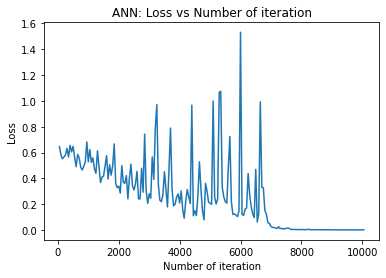

NameError: ignored

In [66]:
# visualization loss 
plt.plot(iteration_list,np.array(torch.tensor(loss_list, device='cpu')))
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()